# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [22]:
#question 1 part 1
import pandas as pd
import numpy as np
import seaborn as sns

url = "https://raw.githubusercontent.com/ds4e/wrangling/refs/heads/main/assignment/data/airbnb_hw.csv"
df1 = pd.read_csv(url,low_memory=False)
print(df1)

#cleaning, remove symbols$ and seperaters , .
df1['Price'] = df1['Price'].str.replace('[\$,]', '', regex=True)

#coercion
var = 'Price'


# coerce a variable to numeric:
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce') # Coerce the variable to numeric

# Create a missing dummy:
df1['Price_nan'] = df1['Price'].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', df1['Price'].describe(),'\n') # Describe the numeric variable
print('Total Missings: \n', sum(df1['Price_nan']),'\n')
# I got 0 missing values.

        Host Id Host Since                                Name Neighbourhood   \
0       5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1      33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2      39608626        NaN                Sunny Room in Harlem      Manhattan   
3           500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4           500  6/26/2008            Trendy Times Square Loft      Manhattan   
...         ...        ...                                 ...            ...   
30473  43022976  8/31/2015   10 Mins to Time Square/two floors         Queens   
30474  42993382  8/31/2015       1BR ocean view & F,Q train st       Brooklyn   
30475  43033067  8/31/2015                Amazing Private Room       Brooklyn   
30476  43000991  8/31/2015   Charming private female room: UWS      Manhattan   
30477  42999189  8/31/2015    Huge Beautiful Bedroom - Astoria         Queens   

      Property Type  Review

I realized that when a price goes over 999 dollars, prices like 1,112 has commas that would cause parsing issues. So I cleaned the Price variable by removing dollar signs ($) and commas (,) for numbers over 999, converting the column to numeric and ensuring no missing values were introduced. After cleaning, I ended up with 0 missing values.

In [23]:
# Question 1 part 2
#Question 1 Part 2
url2 = "https://raw.githubusercontent.com/ds4e/wrangling/refs/heads/main/assignment/data/mn_police_use_of_force.csv"
df2 = pd.read_csv(url2,low_memory=False)
print(df2)

# Create a missing dummy:
df2['subject_injury_nan'] = df2['subject_injury'].isnull() # Equals 1 if missing, 0 if non-null)
missingvalues = sum(df2['subject_injury_nan'])
print(missingvalues)

print('Total Missings: \n', missingvalues,'\n') #9848 of total missings

# proportion of missing values
totalnumber = len(df2)
print(f"Total rows: {totalnumber}")
proportion = missingvalues / totalnumber
print(proportion)

# cross tabulate
cross_tab = pd.crosstab(df2['subject_injury'], df2['force_type']) # Notice the use of pd. and not df.
print(cross_tab.to_string())



         response_datetime               problem is_911_call primary_offense  \
0      2016/01/01 00:47:36  Assault in Progress          Yes          DASLT1   
1      2016/01/01 02:19:34                Fight           No          DISCON   
2      2016/01/01 02:19:34                Fight           No          DISCON   
3      2016/01/01 02:28:48                Fight           No          PRIORI   
4      2016/01/01 02:28:48                Fight           No          PRIORI   
...                    ...                   ...         ...             ...   
12920  2021/08/30 21:38:46  Assault in Progress          Yes        ASLT5      
12921  2021/08/30 22:32:22      Unwanted Person          Yes        CIC        
12922  2021/08/31 12:03:08       Overdose w/All          Yes        FORCE      
12923  2021/08/31 12:52:52      Attempt Pick-Up           No        WT         
12924  2021/08/31 21:34:29      Unwanted Person           No        FORCE      

      subject_injury         force_type

After cleaning the categorical, I realized that there are a total of 9848 missing values out of a total of 12925 rows of data. So the proporation of missing values is 9848/12925 = 0.76 (rounding to 2 decimal places), which is 76%. The high proportion of missing values is a concern as the missing values could affect the validity of conclusions regarding police use of force and injury outcomes and it would also introduce bias.

After cross-tabulating, according to the table generated, the inuries seem to be concentrated in categories like Gun Point Display, Firearm, and Police K9 Bite, where injuries might have been expected but are largely absent in the table. The fact that Bodily Force and Taser have a higher proportion of both "Yes" and "No" means they are more consistently reported compared to others. This missing data issue is concerning because it can bias any conclusions drawn about the relationship between force type and injuries.

In [26]:
import pandas as pd

url = "http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv"
df3 = pd.read_csv(url, low_memory=False)
print(df3.head())
print(df3.columns.tolist())

tobecleaned = df3['WhetherDefendantWasReleasedPretrial']
print(tobecleaned.unique(),'\n') #Get unique values of the variable
#Three unique values: [9 0 1]
print(tobecleaned.value_counts(),'\n')
tobecleaned = tobecleaned.replace(9,np.nan) #replace 9 with NaN
print(tobecleaned.value_counts(),'\n')
print(sum(tobecleaned.isnull())) #counthow many 9s were correctly replaced
df3['WhetherDefendantWasReleasedPretrial'] = tobecleaned
del tobecleaned


  InternalStudyID REQ_REC# Defendant_Sex Defendant_Race Defendant_BirthYear  \
0        ADI00001        1             M              W                1986   
1        ADI00007        3             M              B                1956   
2        ADI00008        4             M              W                1990   
3        CDI00036        6             M              B                1989   
4        CDI00038        7             F              W                1988   

  Defendant_Age  Defendant_AgeGroup Defendant_AgeatCurrentArrest  \
0            31                   3                           31   
1            60                   6                           60   
2            27                   3                           27   
3            27                   3                           27   
4            28                   3                           28   

   Defendant_AttorneyTypeAtCaseClosure  Defendant_IndigencyStatus  ...  \
0                                   99    

When cleaning the WhetherDefendantWasReleasedPretrial variable, I realized that there are three of the uunique values [9, 0, 1], so I replaced the 9s with NaNs. Before cleaning, I got 31 of the value 9s. After cleaning, I only left with 1s and 0s. I replaced all of the 31 9s with NaNs.



In [25]:
# Question 1 part 4
#convert to numeric
df3['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df3['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

#If SentenceType = 9, there is no valid sentencing information, so I set the corresponding imposed sentence to NaN
df3.loc[df3['SentenceTypeAllChargesAtConvictionInContactEvent'] == 9, 'ImposedSentenceAllChargeInContactEvent'] = np.nan

#Ensure That Sentence Length Matches Sentence Type, for example:
# If SentenceType = 0 (Probation/No Incarceration) → Imposed sentence should be 0 months
# If SentenceType = 1 (Jail ≤ 12 months) → Imposed sentence should be between 1 and 12 months
df3.loc[df3['SentenceTypeAllChargesAtConvictionInContactEvent'] == 0, 'ImposedSentenceAllChargeInContactEvent'] = 0
df3.loc[(df3['SentenceTypeAllChargesAtConvictionInContactEvent'] == 1) &
       (df3['ImposedSentenceAllChargeInContactEvent'] > 12), 'ImposedSentenceAllChargeInContactEvent'] = np.nan
df3.loc[(df3['SentenceTypeAllChargesAtConvictionInContactEvent'] == 2) &
       (df3['ImposedSentenceAllChargeInContactEvent'] < 12), 'ImposedSentenceAllChargeInContactEvent'] = np.nan
df3.loc[df3['SentenceTypeAllChargesAtConvictionInContactEvent'] == 4, 'ImposedSentenceAllChargeInContactEvent'] = np.nan
# By doing this, it corrects any mismatch between sentence type and sentence length.

#Some imposed sentence values appear as small decimals (e.g., 0.98 months).
#Since sentences are typically recorded in whole numbers (months), I round all values below 1 month to 1 month, assuming they should be whole numbers.
df3['ImposedSentenceAllChargeInContactEvent'] = df3['ImposedSentenceAllChargeInContactEvent'].apply(
    lambda x: round(x) if pd.notnull(x) and x < 1 else x)

#check the cleaned dataset
print(df3[['SentenceTypeAllChargesAtConvictionInContactEvent', 'ImposedSentenceAllChargeInContactEvent']])

       SentenceTypeAllChargesAtConvictionInContactEvent  \
0                                                     9   
1                                                     0   
2                                                     1   
3                                                     1   
4                                                     4   
...                                                 ...   
22981                                                 4   
22982                                                 9   
22983                                                 4   
22984                                                 4   
22985                                                 4   

       ImposedSentenceAllChargeInContactEvent  
0                                         NaN  
1                                         0.0  
2                                        12.0  
3                                         1.0  
4                                         NaN  
...

To clean the dataset, I first converted the ImposedSentenceAllChargeInContactEvent column to a numeric format, ensuring that non-numeric values were replaced with NaN. Next, I addressed cases where SentenceTypeAllChargesAtConvictionInContactEvent had a value of 9, which indicates missing or unknown sentencing information, by setting the corresponding imposed sentence values to NaN. I then enforced logical consistency by ensuring that cases classified as probation (type 0) had an imposed sentence of 0 months, cases under jail (type 1) had sentences between 1 and 12 months, and cases under prison (type 2) had sentences of at least 12 months. Any records where the sentence type suggested dismissal, deferral, or pending status (type 4) were also set to NaN. Additionally, I rounded small floating-point values (e.g., 0.98 months) to the nearest whole number, assuming that sentences are recorded in full months.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [2]:
#question 2
import pandas as pd
import numpy as np
import seaborn as sns

# Load the Excel file
dfq2 = pd.read_excel('/content/GSAF5.xls')
# Display the first few rows
dfq2.head()

# Q2 part 2: Drop columns that do not contain data
dfq2 = dfq2.drop(columns=['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22'])

print(dfq2)

                     Date    Year        Type             Country  \
0     2025-01-11 00:00:00  2025.0    Provoked                 USA   
1     2025-01-02 00:00:00  2025.0  Unprovoked       New Caledonia   
2     2025-01-02 00:00:00  2025.0  Unprovoked           Australia   
3     2024-12-29 00:00:00  2024.0  Unprovoked               Egypt   
4     2024-12-29 00:00:00  2024.0  Unprovoked               Egypt   
...                   ...     ...         ...                 ...   
6985          Before 1903     0.0  Unprovoked           AUSTRALIA   
6986          Before 1903     0.0  Unprovoked           AUSTRALIA   
6987            1900-1905     0.0  Unprovoked                 USA   
6988            1883-1889     0.0  Unprovoked              PANAMA   
6989            1845-1853     0.0  Unprovoked  CEYLON (SRI LANKA)   

                    State                                 Location  \
0                  Hawaii            Off Haleiwa Boat Harbour Oahu   
1            Grande Terre      

<ipython-input-3-e0a5fe0d905c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfnew['Year'] = dfnew['Year'].astype('Int64')


Year range: 5 to 2026
    Year  Count
0   1940     24
1   1941     27
2   1942     41
3   1943     28
4   1944     31
..   ...    ...
82  2022     98
83  2023    109
84  2024     49
85  2025      4
86  2026      1

[87 rows x 2 columns]
    Year  Count
67  2007    113
68  2008    122
69  2009    120
70  2010    101
71  2011    128
72  2012    117
73  2013    122
74  2014    126
75  2015    143
76  2016    131
77  2017    140
78  2018    124
79  2019    114
80  2020    101
81  2021    109
82  2022     98
83  2023    109
84  2024     49
85  2025      4
86  2026      1


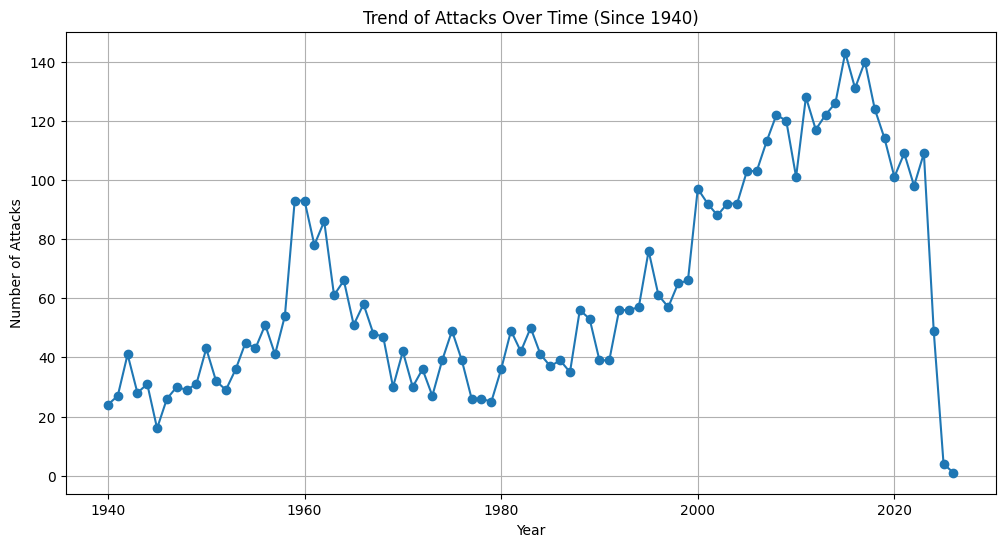

In [3]:
# Q2 part 3
import pandas as pd

# Convert 'Year' column to numeric, setting errors='coerce' to turn invalid entries into NaN
dfq2['Year'] = pd.to_numeric(dfq2['Year'], errors='coerce')
# Replace 0000 (unknown years) with NaN
dfq2.loc[dfq2['Year'] == 0, 'Year'] = pd.NA
# Remove NaN values in the 'Year' column
dfnew = dfq2.dropna(subset=['Year'])
# Convert 'Year' to integer type (to avoid float issues)
dfnew['Year'] = dfnew['Year'].astype('Int64')

# Describe the range of years
min_year = dfnew['Year'].min()
max_year = dfnew['Year'].max()
print(f"Year range: {min_year} to {max_year}")
# So I got that the year range from 0005 to 2026 after removing all the NaN (0000).

# Filter attacks since 1940
dfnew_filtered = dfnew[dfnew['Year'] >= 1940]
# Count the number of cases per year
yearly_counts = dfnew_filtered.groupby('Year').size().reset_index(name='Count')
print(yearly_counts)
print(yearly_counts.tail(20))

# creating a line chart to see the trend of shark attacks
import matplotlib.pyplot as plt
# Plot the trend of attacks over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts['Year'], yearly_counts['Count'], marker='o', linestyle='-')
# Formatting the plot
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Trend of Attacks Over Time (Since 1940)")
plt.grid(True)
# Show the plot
plt.show()

# From the plot, we can clearly see that the number of shark attacks is increasing from 1940 to 2015.
# There is a sudden drop in shark attack after the year 2023.

<Axes: >

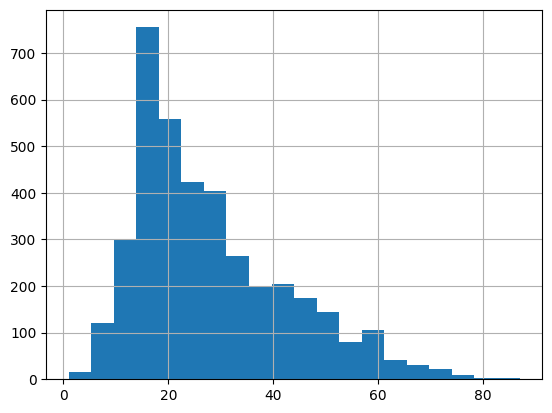

In [4]:
 # Q2 part 5
dfq2['Age'] = pd.to_numeric(dfq2['Age'], errors='coerce')   #coerce the "Age" variable to numeric
dfq2['Age'].hist(bins=20) #historgam

In [7]:
 # Q2 part 5
import pandas as pd
import numpy as np

# remove strip spaces from values:' M', 'M ')
dfq2['Sex'] = dfq2['Sex'].astype(str).str.strip()
print(dfq2['Sex'].unique())

#Replace incorrect values with NAN
dfq2['Sex'] = dfq2['Sex'].replace({'lli': np.nan, 'M x 2': 'M'})
print(dfq2['Sex'].unique())
#output: ['M' 'F' 'nan' nan]

#remove 'nan'
dfq2['Sex'] = dfq2['Sex'].replace({'nan': np.nan})
print(dfq2['Sex'].unique())
#output: ['M' 'F' nan]

male_proportion = (dfq2['Sex'] == 'M').mean()
print(male_proportion)

# The proportion of male is 0.8033... (80%)

['M' 'F' 'nan' 'lli' 'M x 2' 'N' '.']
['M' 'F' 'nan' nan 'N' '.']
['M' 'F' nan 'N' '.']
0.8032904148783977


In [72]:
# Q2 part 6

import numpy as np

# Clean the Type column so it only contains 'Provoked', 'Unprovoked', or 'Unknown'
dfq2['Type'] = np.where(dfq2['Type'].isin(['Provoked', 'Unprovoked']), dfq2['Type'], 'Unknown')

# Display cleaned data
print(dfq2[['Type']].value_counts())  # Count occurrences of each category
# I got 5151 'Unprovoked', 1202 'Unknown' and 637 'Provoked'.

# Proportion of Unprovoked
Prop = 5151/(5151+1202+637)
print(Prop)
# Proportion of Unprovoked is 0.7369... (74%)

Type      
Unprovoked    5151
Unknown       1202
Provoked       637
Name: count, dtype: int64
0.7369098712446351


In [10]:
# Q2 part 7
import numpy as np

dfq2['Fatal Y/N'] = dfq2['Fatal Y/N'].astype(str).str.strip()
print(dfq2['Fatal Y/N'].value_counts())

dfq2['Fatal Y/N'] = dfq2['Fatal Y/N'].replace(['F','M','2017','nan','Nq','Y x 2','y'],np.nan)
dfq2['Fatal Y/N'] = dfq2['Fatal Y/N'].replace('n','N')
print(dfq2['Fatal Y/N'].value_counts())

Fatal Y/N
N          4879
Y          1468
nan         571
UNKNOWN      71
y             1
Name: count, dtype: int64
Fatal Y/N
N          4879
Y          1468
UNKNOWN      71
Name: count, dtype: int64


In [84]:
# Q2 part 8
import pandas as pd

# Filter for only 'Unprovoked' attacks
unprovoked_attacks = dfq2[dfq2['Type'] == 'Unprovoked']

# Count occurrences of 'M' and 'F' in unprovoked attacks
unprovoked_by_sex = unprovoked_attacks.groupby('Sex').size().reset_index(name='Count')
print(unprovoked_by_sex)
# There are 670 F and 4309 M in unprovoked attacks. So there are more males in unprovoked attacks.


# Count occurrences of 'Y' and 'N' in unprovoked attacks
unprovoked_by_fatality= unprovoked_attacks.groupby('Fatal Y/N').size().reset_index(name='Count')
print(unprovoked_by_fatality)
# There are 3815 N and 1251 Y in unprovoked attacks. So there are more fatals in unprovoked attacks.

# Filter for only 'Provoked' attacks
provoked_attacks = dfq2[dfq2['Type'] == 'Provoked']
# Count occurrences of 'Y' and 'N' in provoked attacks
provoked_by_fatality= provoked_attacks.groupby('Fatal Y/N').size().reset_index(name='Count')
print(provoked_by_fatality)
# There are 605 N and 20 Y in provoked attacks. So it is less likely to be fatal in provoked attacks.

# Filter for only Y
Fatal = dfq2[dfq2['Fatal Y/N'] == 'Y']
# Count occurrences of 'M' and 'F' in Y
fatality_rate = Fatal.groupby('Sex').size().reset_index(name='Count')
# Display results
print(fatality_rate)
# There are 120 F and 1239 M that are fatal. So there are more males that are fatal.


  Sex  Count
0   F    670
1   M   4309
  Fatal Y/N  Count
0         N   3815
1   Unknown     85
2         Y   1251
  Fatal Y/N  Count
0         N    605
1   Unknown     12
2         Y     20
  Sex  Count
0   F    120
1   M   1239


In [89]:
# Q2 part 9
import pandas as pd

# Strip spaces from all column names as I realized the column 'Species ' has a space
dfq2.rename(columns=lambda x: x.strip(), inplace=True)

# Verify that 'Species' is now correct
print(dfq2.columns)
# Convert 'Species' column to lowercase for consistency
dfq2['Species'] = dfq2['Species'].astype(str).str.lower()
# Count total number of attacks
total_attacks = len(dfq2)
# Count occurrences of 'white shark' in the Species column
white_shark_attacks = dfq2['Species'].str.contains('white shark', na=False).sum()

# Calculate proportion of attacks by white sharks
white_shark_proportion = white_shark_attacks / total_attacks

# Display results
print(f"Total Attacks: {total_attacks}")
print(f"White Shark Attacks: {white_shark_attacks}")
print(f"Proportion of White Shark Attacks: {white_shark_proportion:.2%}")


Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species',
       'Source'],
      dtype='object')
Total Attacks: 6990
White Shark Attacks: 700
Proportion of White Shark Attacks: 10.01%


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

1. This paper highlights an essential component of data cleaning: data tidying. Tidy data is structured in a straightforward manner, where each variable corresponds to a column, each observation occupies a row, and each type of observational unit is organized into a table. This structured approach streamlines the processing of messy datasets and facilitates the creation of efficient data analysis tools. The abstract defines data tidying, explains its benefits, and presents a case study illustrating its practical advantages.

2. The introduction explains that the tidy data standard offers a consistent method for organizing data values within a dataset. This standard is designed to support the initial exploration and analysis of data while also streamlining the development of data analysis tools that integrate effectively. As a result, it simplifies the overall data analysis process.

3. The sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." means that tidy datasets follow a uniform, well-structured format, making them easy to work with. In contrast, messy datasets can be disorganized in many different ways, requiring unique cleaning approaches for each case. Tidy data establishes a consistent relationship between a dataset’s structure (its layout) and its semantics (its meaning), making analysis more straightforward. However, messy data can violate these principles in different ways, such as having column headers that represent values instead of variable names or storing multiple variables within a single column. This variation in disorganization is why each messy dataset requires a different cleaning strategy.

The sentence "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." means that tidy datasets follow a uniform, well-structured format, making them easy to work with. In contrast, messy datasets can be disorganized in many different ways, requiring unique cleaning approaches for each case. Tidy data establishes a consistent relationship between a dataset’s structure (its layout) and its semantics (its meaning), making analysis more straightforward. However, messy data can violate these principles in different ways, such as having column headers that represent values instead of variable names or storing multiple variables within a single column. This variation in disorganization is why each messy dataset requires a different cleaning strategy.

4. A dataset is a collection of values, which can be either numerical or categorical (strings). Each value is associated with both a variable and an observation. A variable consists of a set of values that measure the same characteristic or property, such as texture, color, shape. An observation is a collection of values that describe a specific instance or case within the dataset.

5. Tidy data provides a standardized method for organizing a dataset by aligning its structure with its meaning. Whether a dataset is considered tidy or messy depends on how rows, columns, and tables correspond to observations, variables, and data types. In a tidy dataset:  

Each variable is represented as a column.  
Each observation is represented as a row.  
Each type of observational unit is organized into a separate table.

6.
This section outlines five common issues found in messy datasets and their solutions:1 Column headers are values, not variable names. 2 Multiple variables are stored in one column. 3 Variables are stored in both rows and columns. 4 Multiple types of observational units are stored in the same table. 5 A single observational unit is stored in multiple tables.

In Table 4, the dataset is messy because its column headers contain values rather than variable names. As noted in the text, a frequent cause of messy data is tabular formats designed for presentation, where variables appear in both rows and columns, and column headers store values instead of meaningful variable names.

Referencing from the article:

Melting is a process that restructures a dataset by selecting certain columns as fixed variables (colvars), while converting the remaining columns into two new variables—one for column headings and another for data values.

In the case of Table 4, melting would transform income ranges (which are currently column headers) into a single "income" column, while creating another column, "freq," to store the corresponding values. This restructuring makes the data tidy and easier to analyze.

7.
Table 11 is considered messy because the days are used as column headers instead of being represented as a single "date" variable. This structure complicates data manipulation and analysis.  

Table 12(a) is molten, meaning the days have been consolidated into a single "date" column, improving organization. However, it is still not fully tidy because the "element" column contains variable names (tmax, tmin) rather than actual data values.  

Table 12(b) achieves a tidy format because each row represents a single day's observation, and each variable—date, tmax, and tmin—is assigned its own column. This proper structuring makes the dataset easier to analyze.


8. The chicken-and-egg problem with tidy data refers to the idea that its usefulness is directly tied to the tools designed to work with it. This creates a cycle where tidy tools and tidy data become closely interconnected. If people adopt tidy data primarily because of tools like ggplot2 and dplyr, as mentioned in the article, then the concept might seem like just a way to promote these tools rather than a fundamental approach to data organization. However, Wickham envisions tidy data as more than just a framework tied to specific tools. He hopes it will influence the broader philosophy of data cleaning and organization. He acknowledges this by stating that while he does not see tidy data as the final solution, he hopes others will build upon it to develop even better data storage strategies and tools. This highlights his goal for tidy data to serve as an inspiration for new ideas, tools, and best practices in data science rather than being limited to existing software.



**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?